In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd drive/MyDrive/uberdataDELETEME/

/content/drive/MyDrive/uberdataDELETEME


In [3]:
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
# data
data = [
    ('toronto-neighbourhoods-2020-1-All-DatesByHourBucketsAggregate.csv', 'Toronto', [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 1, 0, 1, 1, 1, 2, 3, 15, 17, 17, 18, 22, 24, 25, 31, 31, 37, 54, 74, 98, 140, 172, 183, 208, 251, 311, 369, 412, 489, 572, 667, 835, 967, 1117, 1324, 1252, 1399]),
    ('vienna-statistical_areas-2020-1-All-DatesByHourBucketsAggregate.csv', 'Vienna', [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 3, 7, 8, 12, 17, 23, 37, 46, 75, 98, 126, 148, 203, 312, 409, 591, 801, 999, 1225, 1571, 1943, 2398, 2907, 3455, 4073, 4760, 5483, 6237, 7293, 8100, 8717, 9264]),
    ('washington_DC-censustracts-2020-1-All-DatesByHourBucketsAggregate.csv', 'Washington D.C.', [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 4, 10, 0, 0, 12, 16, 17, 22, 31, 39, 71, 77, 98, 116, 137, 183, 231, 267, 304, 342, 401, 495, 586]),
    ('pittsburgh-censustracts-2020-1-All-DatesByHourBucketsAggregate.csv', 'Pittsburgh',[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 12, 11, 3, 10, 7, 11, 24, 49, 26, 59, 45, 22, 38, 34]),
    ('manchester-msoa-2020-1-All-DatesByHourBucketsAggregate.csv', 'Manchester', [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 2, 1, 1, 0, 6, 0, 3, 6, 4, 3, 4, 5, 3, 4, 12, 8, 15, 22, 14, 31, 23, 24, 33]),
]

In [24]:
def scatter(data):
    uber, location, covidCases = data
    
    # read csv
    quarter1 = pd.read_csv(uber, usecols=['sourceid', 'dstid', 'month', 'day', 'start_hour', 'end_hour', 'mean_travel_time'])
    
    # mean travel time by day
    mean_travel_time_per_day = quarter1.groupby(['month', 'day'])['mean_travel_time'].mean()
    
    # plot
    xlabels = list()
    for month, day in mean_travel_time_per_day.index:
        xlabels.append('{:02d}-{:02d}'.format(month, day))
    plt.figure(figsize=(16,16))

    fig, ax1 = plt.subplots(1,1,figsize=(15,15))
    ax2 = ax1.twinx()
    # ax1.plot(x, y1, 'g-')
    # ax2.plot(x, y2, 'b-')

    plt.rc('font', size=11)
    plt.rc('axes', labelsize=16)
    ax1.plot(xlabels, mean_travel_time_per_day.values, '-o', c='red', label="Mean travel time per day")
    ax2.plot(xlabels, covidCases, '-o', c='blue', label="Number of new cases")
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    # plt.ylabel('Mean Travel Time (Seconds)')
    plt.xlabel('Date')
    plt.xticks(rotation=80)
    plt.title('{}, Jan 2020 to March 2020'.format(location));
    plt.show()

<Figure size 1152x1152 with 0 Axes>

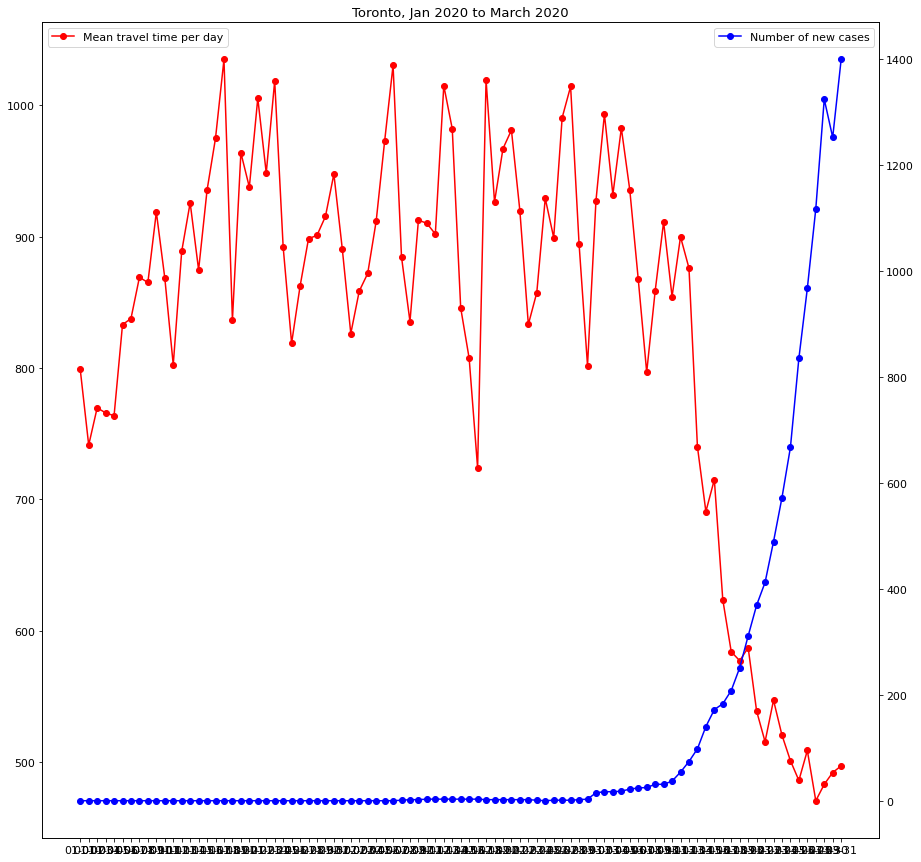

<Figure size 1152x1152 with 0 Axes>

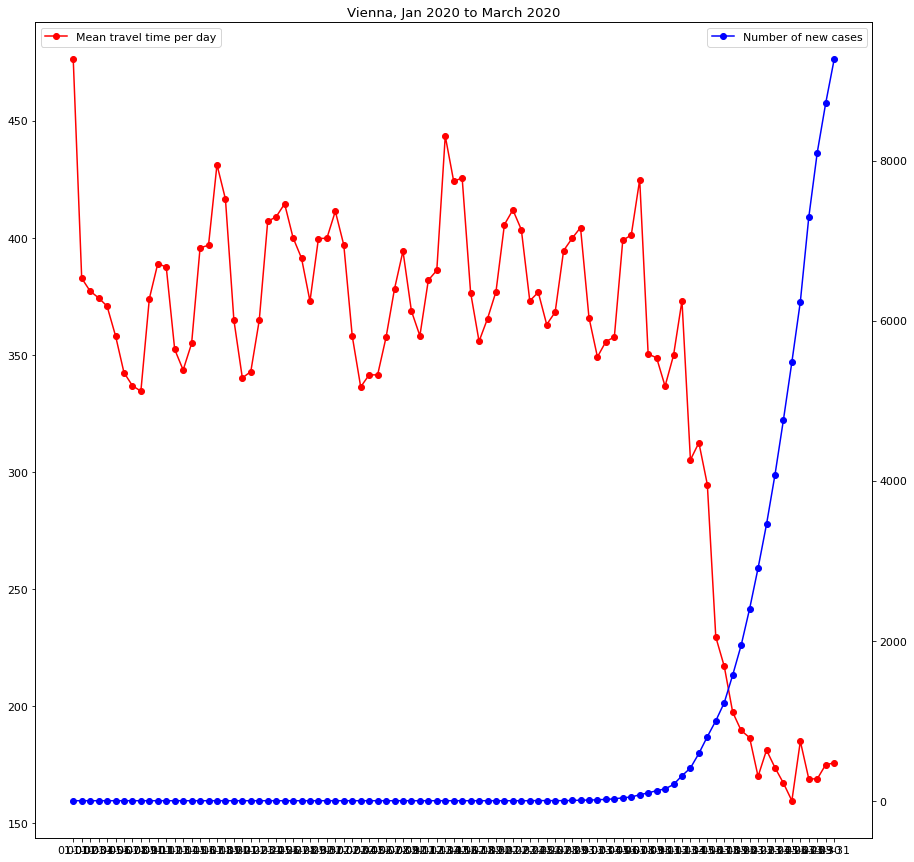

<Figure size 1152x1152 with 0 Axes>

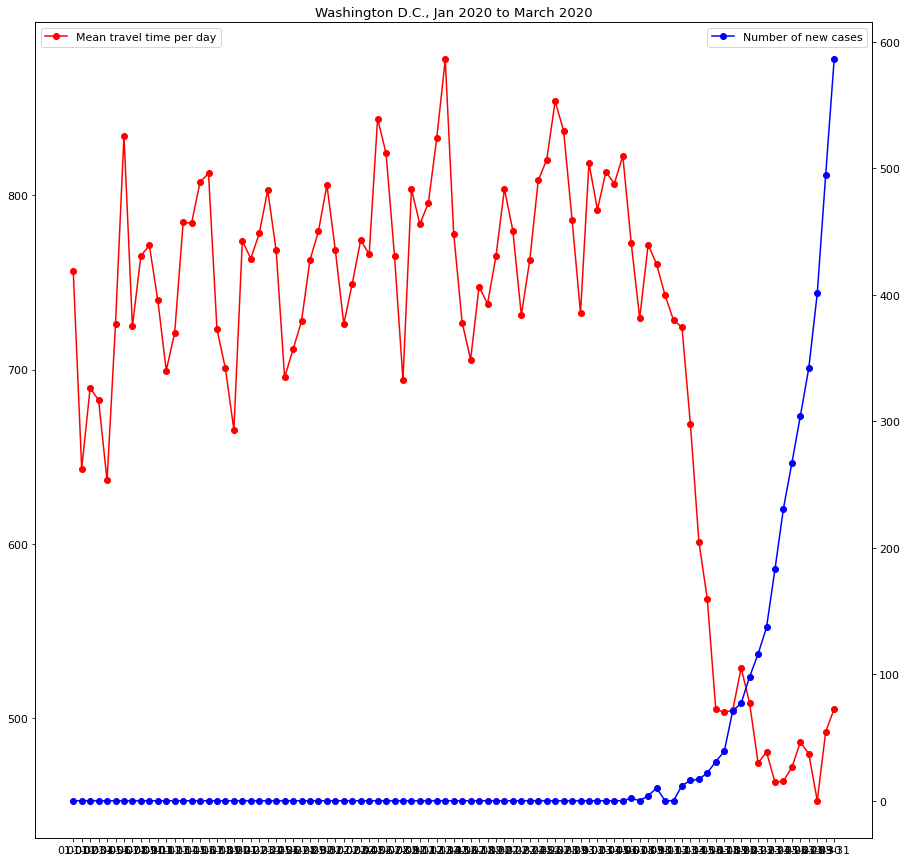

<Figure size 1152x1152 with 0 Axes>

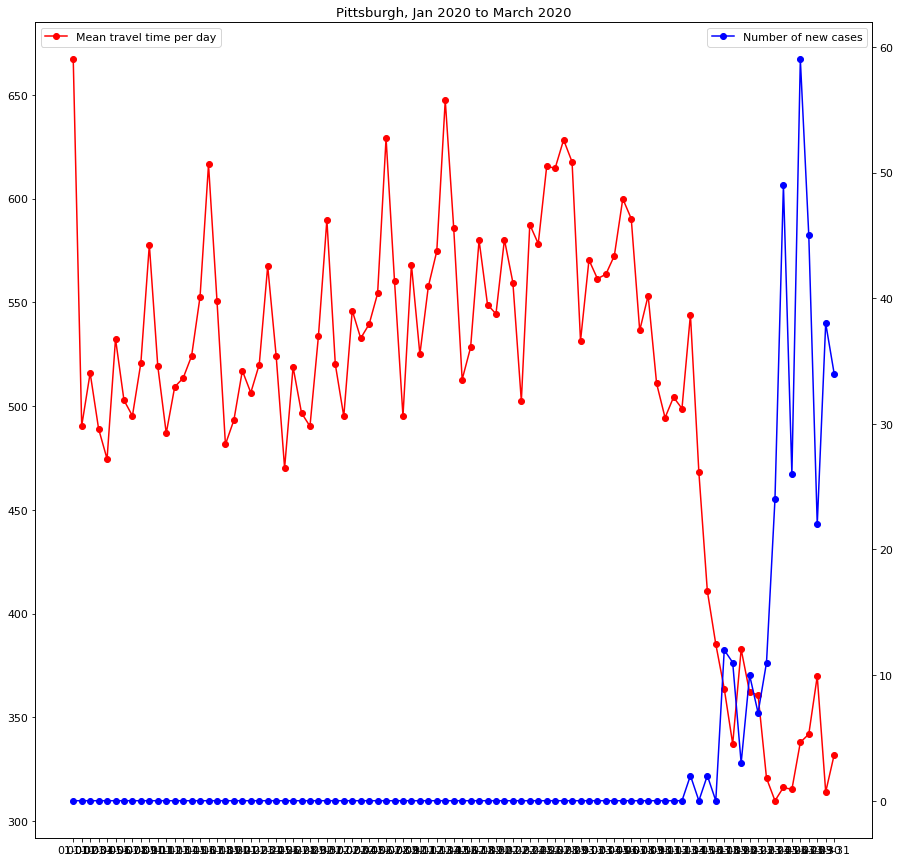

<Figure size 1152x1152 with 0 Axes>

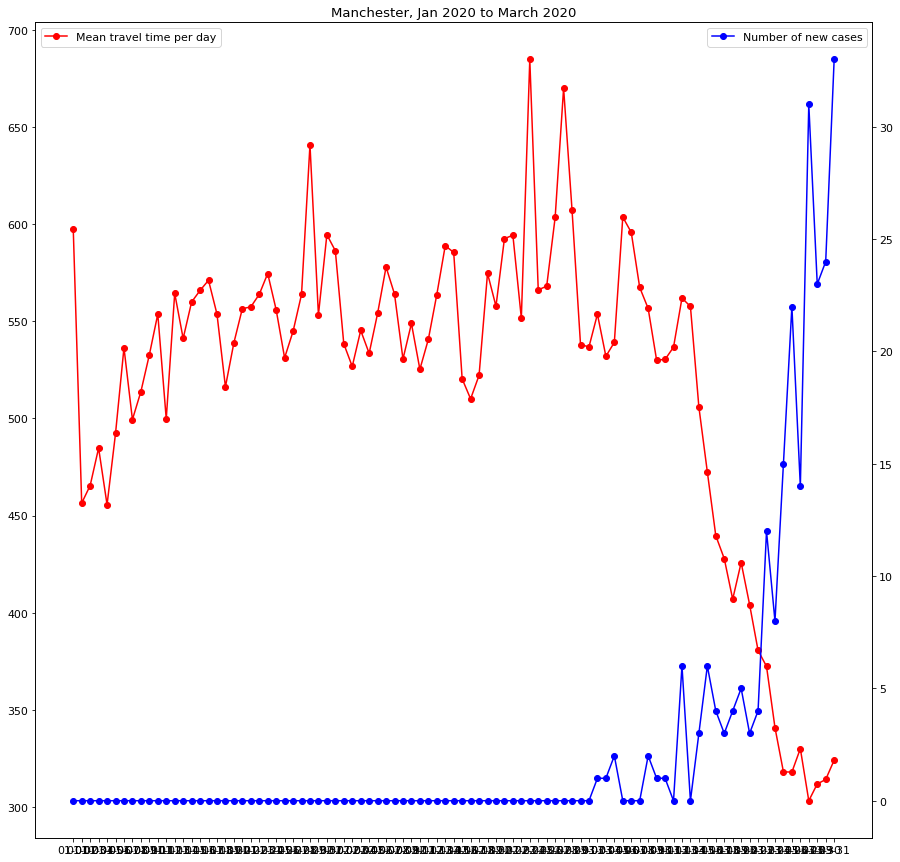

[None, None, None, None, None]

In [25]:
list(map(scatter, data))